# Mark Subclip Intervals

This notebook is used to (manually) identify and document a 15-second interval in relevant videos where a humpback whale encounter is evident. 

We repeat a similar process for irrelevant videos, replacing manual interval annotation with a randomly generated 15-second interval. 

The 15-second intervals annotated here will serve as input for training our model. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
#load df of successful video downloads
workspace_path = '/mount/data'
downloads_df = pd.read_csv(workspace_path + '/downloaded_videos.csv')
downloads_df.head()

,video_id,url,title,license,relevant,renamed_title,clip_start,clip_end
0,67OIlq2oMt0,https://youtu.be/67OIlq2oMt0,Hawaiian Islands Humpback Whale National Marin...,creativeCommon,True,video_0000.mp4,0:10,0:25
1,EUcMuUBMYJc,https://youtu.be/EUcMuUBMYJc,Tagging expedition: revealing the delicate nur...,creativeCommon,True,video_0001.mp4,0:44,0:59
2,dpSuygz7ZmA,https://youtu.be/dpSuygz7ZmA,Your Earth Is Blue: Disentangling a Humpback W...,creativeCommon,True,video_0002.mp4,0:05,0:20
3,jfPzlFLEuKk,https://youtu.be/jfPzlFLEuKk,"Humpback Whale || Description, Characteristics...",creativeCommon,True,video_0003.mp4,2:40,2:55
4,xGasapMoy4I,https://youtu.be/xGasapMoy4I,Your Earth Is Blue: Humpback Whales,creativeCommon,True,video_0004.mp4,0:00,0:15


# Add a Column to Store Clip Interval 
(only run this once)

In [33]:
# downloads_df['clip_start'] = [''for i in range(0, len(downloads_df))]
# downloads_df['clip_end'] = ['' for i in range(0, len(downloads_df))]

# downloads_df.head()

,video_id,url,title,license,relevant,renamed_title,clip_start,clip_end
0,67OIlq2oMt0,https://youtu.be/67OIlq2oMt0,Hawaiian Islands Humpback Whale National Marin...,creativeCommon,True,video_0000.mp4,,
1,EUcMuUBMYJc,https://youtu.be/EUcMuUBMYJc,Tagging expedition: revealing the delicate nur...,creativeCommon,True,video_0001.mp4,,
2,dpSuygz7ZmA,https://youtu.be/dpSuygz7ZmA,Your Earth Is Blue: Disentangling a Humpback W...,creativeCommon,True,video_0002.mp4,,
3,jfPzlFLEuKk,https://youtu.be/jfPzlFLEuKk,"Humpback Whale || Description, Characteristics...",creativeCommon,True,video_0003.mp4,,
4,xGasapMoy4I,https://youtu.be/xGasapMoy4I,Your Earth Is Blue: Humpback Whales,creativeCommon,True,video_0004.mp4,,


# Relevant Subclip Annotation

In [3]:
#functions to double check relevance of each new potential video
from IPython.display import YouTubeVideo, Image, display, Video, HTML

def display_video(index, video_title, url):
    # display video - need to pass in videoID (at end of url) 
    print("{}: {}".format(index, video_title))
    print(url)
    videoID = url.split('/')[3]
    display(YouTubeVideo(videoID))

def get_occurence_intervals():
    '''allows user to enter occurence interval start + end time'''

    start = input('Clip Start Time: ')
    end = input('Clip End Time:   ')

    return start, end

How many videos do you want to annotate?: 

 10


193: video_0239.mp4
https://youtu.be/HLQO9tbuBk8


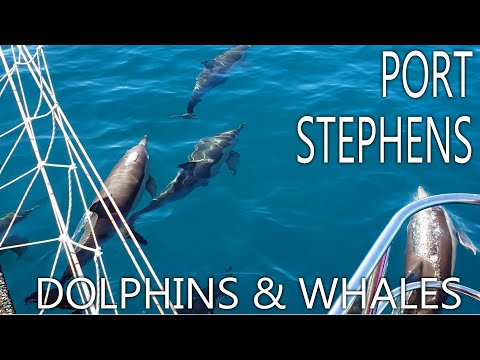

Clip Start Time:  4:30
Clip End Time:    4:45


197: video_0243.mp4
https://youtu.be/loyJhEcs7YM


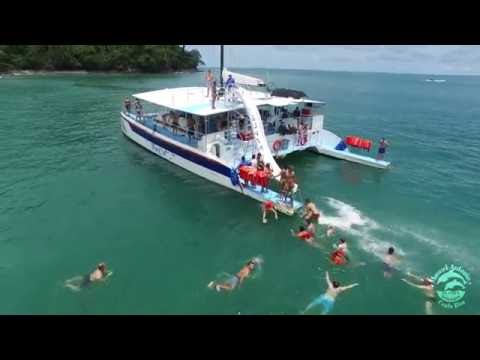

Clip Start Time:  0:49
Clip End Time:    0:56


198: video_0244.mp4
https://youtu.be/VgXcUtZiURI


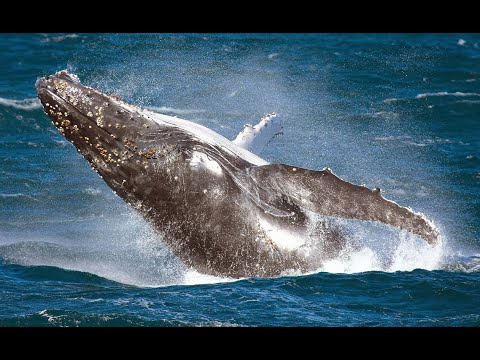

Clip Start Time:  1:45
Clip End Time:    2:00


199: video_0245.mp4
https://youtu.be/4j-JsR8j2D8


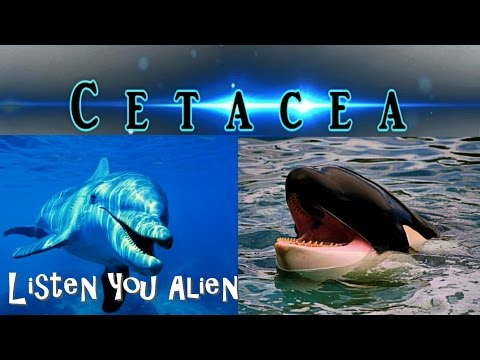

Clip Start Time:  4:10
Clip End Time:    4:25


200: video_0246.mp4
https://youtu.be/iTj6pofVoiM


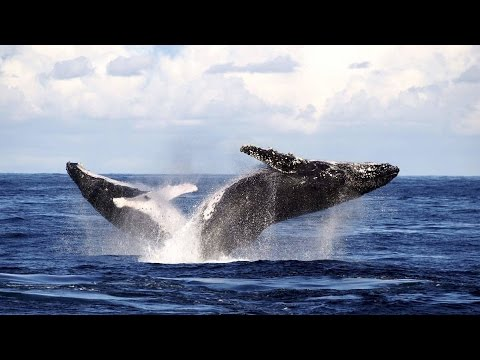

Clip Start Time:  5:55
Clip End Time:    6:10


203: video_0249.mp4
https://youtu.be/cAHR6pO4TOc


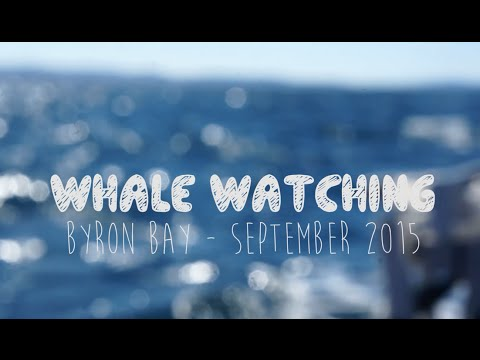

Clip Start Time:  6:15
Clip End Time:    6:30


206: video_0252.mp4
https://youtu.be/KN8cpRJn7tU


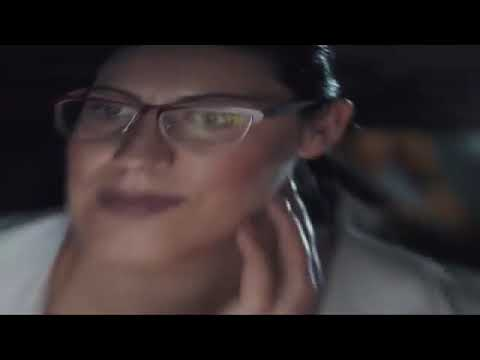

Clip Start Time:  4:34
Clip End Time:    4:49


208: video_0254.mp4
https://youtu.be/28GWJnuIEN4


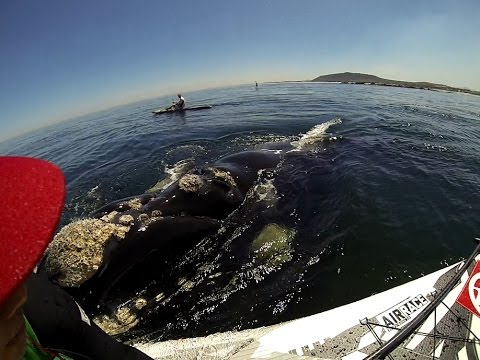

Clip Start Time:  0:13
Clip End Time:    0:28


211: video_0257.mp4
https://youtu.be/wi3bfPTbojc


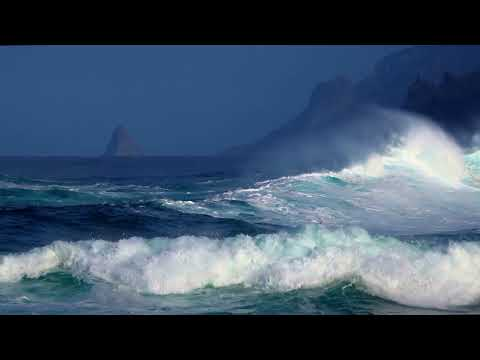

Clip Start Time:  1:38
Clip End Time:    1:53


215: video_0262.mp4
https://youtu.be/tf8BBa1v5mc


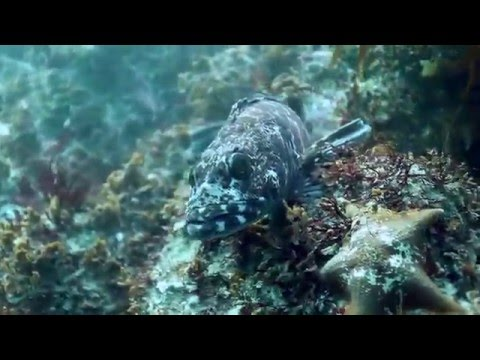

Clip Start Time:  0:14
Clip End Time:    0:29


Done annotating videos 193 to 215 



In [18]:
#loop through relevant videos and annotate whale encounter intervals
print('How many videos do you want to annotate?:', end = " ")
num_videos = int(input())

#pickup on the next relevant video w/o a clip interval
video_indices_to_annotate = list(downloads_df[(downloads_df.clip_start.isna()) & (downloads_df.relevant == True)].index)

#annotate clip intervals and record in dataset
for i in video_indices_to_annotate[:num_videos]:
    row = downloads_df.loc[i]
    display_video(i, row['renamed_title'], row['url'])
    clip_start, clip_end = get_occurence_intervals()
    downloads_df.at[i, ('clip_start')] = clip_start
    downloads_df.at[i, ('clip_end')] = clip_end   
    
print(f'Done annotating videos {video_indices_to_annotate[0]} to {video_indices_to_annotate[num_videos-1]} \n')

In [19]:
#checking updates
downloads_df[(downloads_df.clip_start.notna()) & (downloads_df.relevant == True)][-4:]

,video_id,url,title,license,relevant,renamed_title,clip_start,clip_end
206,KN8cpRJn7tU,https://youtu.be/KN8cpRJn7tU,this is what is beggest whale in the world,creativeCommon,True,video_0252.mp4,4:34,4:49
208,28GWJnuIEN4,https://youtu.be/28GWJnuIEN4,Whale almost knocking over standuppaddler!,creativeCommon,True,video_0254.mp4,0:13,0:28
211,wi3bfPTbojc,https://youtu.be/wi3bfPTbojc,"There Be Whales, Jim!",creativeCommon,True,video_0257.mp4,1:38,1:53
215,tf8BBa1v5mc,https://youtu.be/tf8BBa1v5mc,Your Earth Is Blue: Stellwagen Bank and Monter...,creativeCommon,True,video_0262.mp4,0:14,0:29


In [20]:
print(len(downloads_df[(downloads_df.clip_start.isna()) & (downloads_df.relevant == True)]), 'more relevant videos to annotate')

40 more relevant videos to annotate


# Save Changes

In [21]:
# update csv with annotated intervals
downloads_df.to_csv(workspace_path + '/downloaded_videos.csv', index=False)
downloads_df.to_csv('/workspace/youtube-humpback-whale-classifier/data/downloaded_videos.csv', index=False)